# Machine Learning Approach for Employee Salary Prediciton

#### Steps Involved:
    1. Importing libraries and Dataset.
    2. Data preprocessing.
    3. Explanatory Data analysis.
    4. Feature Engineering.
    5. Predictive Modelling and Validation.
    6. Optimization.

### Part 1 - Importing Libraries and Dataset

In [664]:
# In this section, We will import all the libraries required and the dataset we will be using for this project
# We will update this section along the way and add libraries we require as per our needs

import pandas as pd
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
import joblib as jb

In [573]:
# Now let's import the dataset

data = pd.read_csv(r'C:\Users\Amaan Ahmed\Music\Project\Employee_Payroll.csv')

# This project is available on my GitHub.
# If you cloned my repository, you will need to change this path to the one where the dataset is located

In [574]:
# Let's check our dataset using the head() method. This step is optional and in no way does it affect our goal.

data.head(5)

,Fiscal Year,Fiscal Quarter,Fiscal Period,First Name,Last Name,Middle Init,Bureau,Office,Office Name,Job Code,Job Title,Base Pay,Position ID,Employee Identifier,Original Hire Date
0,2016,1,2016Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20088.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,05/16/2005
1,2016,2,2016Q2,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23436.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,05/16/2005
2,2016,3,2016Q3,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20422.82,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,05/16/2005
3,2016,4,2016Q4,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23904.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,05/16/2005
4,2017,1,2017Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20745.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,05/16/2005


### Part 2 - Data Preprocessing

In [575]:
# Let's calculate the number of null values present in the columns of our dataset

data.isnull().sum()

Fiscal Year                0
Fiscal Quarter             0
Fiscal Period              0
First Name                 0
Last Name                  0
Middle Init            93412
Bureau                     0
Office                  3184
Office Name             3184
Job Code                   0
Job Title                  0
Base Pay                   4
Position ID                0
Employee Identifier        0
Original Hire Date         0
dtype: int64

In [576]:
# Let's find out the number of rows or instances in our dataset

len(data)

234299

In [577]:
# Let's determine the percentage of null values present in the columns of our dataset

null_percentage = (data.isnull().sum() / len(data)) * 100
print(null_percentage)

Fiscal Year             0.000000
Fiscal Quarter          0.000000
Fiscal Period           0.000000
First Name              0.000000
Last Name               0.000000
Middle Init            39.868715
Bureau                  0.000000
Office                  1.358947
Office Name             1.358947
Job Code                0.000000
Job Title               0.000000
Base Pay                0.001707
Position ID             0.000000
Employee Identifier     0.000000
Original Hire Date      0.000000
dtype: float64


In [578]:
# Now, observbe that none of our columns have more than 80% of null values.
# Hence we can choose to fill these null values instead of dropping the entire rows.
# Therefore, we can use the forward fill method to fill those null values.

data.fillna(method='ffill', inplace=True)

In [579]:
# Now let's use the info() method to check if the previous step worked or not

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234299 entries, 0 to 234298
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Fiscal Year          234299 non-null  int64  
 1   Fiscal Quarter       234299 non-null  int64  
 2   Fiscal Period        234299 non-null  object 
 3   First Name           234299 non-null  object 
 4   Last Name            234299 non-null  object 
 5   Middle Init          234299 non-null  object 
 6   Bureau               234299 non-null  object 
 7   Office               234299 non-null  float64
 8   Office Name          234299 non-null  object 
 9   Job Code             234299 non-null  int64  
 10  Job Title            234299 non-null  object 
 11  Base Pay             234299 non-null  float64
 12  Position ID          234299 non-null  int64  
 13  Employee Identifier  234299 non-null  object 
 14  Original Hire Date   234299 non-null  object 
dtypes: float64(2), in

In [580]:
# As we can see, it worked. None of the columns contains a null value.
# But, if you observe, all the column names has a space between them
# Also the original hire date column, which contains an actual date, is of 'object' data type.
# Let's correct these two issues.

# Let's start with the column names

data.columns

Index(['Fiscal Year', 'Fiscal Quarter', 'Fiscal Period', 'First Name',
       'Last Name', 'Middle Init', 'Bureau', 'Office', 'Office Name',
       'Job Code', 'Job Title', 'Base Pay', 'Position ID',
       'Employee Identifier', 'Original Hire Date'],
      dtype='object')

In [581]:
# Let's change the column names using the rename() method

data.rename(columns = lambda x: x.replace(" ","_"), inplace = True)

In [582]:
# Let's check and confirm the changes

data.columns

Index(['Fiscal_Year', 'Fiscal_Quarter', 'Fiscal_Period', 'First_Name',
       'Last_Name', 'Middle_Init', 'Bureau', 'Office', 'Office_Name',
       'Job_Code', 'Job_Title', 'Base_Pay', 'Position_ID',
       'Employee_Identifier', 'Original_Hire_Date'],
      dtype='object')

In [583]:
# Now let's change the datatype of the original hire date

# import datetime

data['Original_Hire_Date'] = pd.to_datetime(data['Original_Hire_Date'])

In [584]:
# Let's check and confirm the changes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234299 entries, 0 to 234298
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Fiscal_Year          234299 non-null  int64         
 1   Fiscal_Quarter       234299 non-null  int64         
 2   Fiscal_Period        234299 non-null  object        
 3   First_Name           234299 non-null  object        
 4   Last_Name            234299 non-null  object        
 5   Middle_Init          234299 non-null  object        
 6   Bureau               234299 non-null  object        
 7   Office               234299 non-null  float64       
 8   Office_Name          234299 non-null  object        
 9   Job_Code             234299 non-null  int64         
 10  Job_Title            234299 non-null  object        
 11  Base_Pay             234299 non-null  float64       
 12  Position_ID          234299 non-null  int64         
 13  Employee_Ident

In [585]:
# Let's also drop duplicates as our last step in this section

data.drop_duplicates(inplace=True)

### Part 3 - Exploratory Data Analysis

In [586]:
# Lets take a look at our dataset

data.head(5)

,Fiscal_Year,Fiscal_Quarter,Fiscal_Period,First_Name,Last_Name,Middle_Init,Bureau,Office,Office_Name,Job_Code,Job_Title,Base_Pay,Position_ID,Employee_Identifier,Original_Hire_Date
0,2016,1,2016Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20088.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16
1,2016,2,2016Q2,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23436.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16
2,2016,3,2016Q3,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20422.82,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16
3,2016,4,2016Q4,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23904.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16
4,2017,1,2017Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20745.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16


In [587]:
# Now, notice that we have a feature (column) in our dataset called "Employee_identifier".
# This feature contains unique identification numbers of the employees.
# We can use this feature to determine the number of employees we have in our dataset

data.Employee_Identifier.nunique()

28375

In [588]:
# We know that this dataset contains information about 28375 employees.
# Now let's once again take a look at the number of instances in our dataset

len(data)

234298

In [589]:
# Notice that our dataset contains 234298 instances.
# Let's filter our dataset and select only those instances that contain duplicates of employees identification number.
# Performing this operation we will be only selecting the employees who have repeated instances.

data[data.Employee_Identifier.duplicated() == True]

,Fiscal_Year,Fiscal_Quarter,Fiscal_Period,First_Name,Last_Name,Middle_Init,Bureau,Office,Office_Name,Job_Code,Job_Title,Base_Pay,Position_ID,Employee_Identifier,Original_Hire_Date
1,2016,2,2016Q2,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23436.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16
2,2016,3,2016Q3,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20422.82,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16
3,2016,4,2016Q4,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23904.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16
4,2017,1,2017Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20745.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16
5,2017,2,2017Q2,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,24473.38,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234294,2018,2,2018Q2,NORMA,AMOFA-LOZA,E.,STATES ATTORNEY,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,19001.95,9510048,ac4574b1-d301-44a7-a220-d3aafb5e9ec3,2013-01-28
234295,2018,2,2018Q2,FRANK,PHILLIPS,J,DEPT. OF FACILITIES/MGMT,1200.0,DEPT. OF FACILITIES/MGMT,2452,Operating Engineer II,27098.40,9502511,9839f658-99a7-4b0c-a338-411d2fc2e8c9,1988-01-05
234296,2018,1,2018Q1,CYNTHIA,KENDRICK,R,ADULT PROBATION DEPT.,1280.0,ADULT PROBATION DEPT.,1567,Adult Probation Officer- PSB,19217.40,9512421,709a5fed-c9a2-4fe6-9d4d-439bd389b5b8,1985-07-01
234297,2018,1,2018Q1,LAURA,TOLEDO,R,AMBULATORY COMMUNITY HLTH NTWK,4893.0,AMBULATORY COMMUNITY HLTH NTWK,5296,Medical Assistant,9698.80,9519643,8967b2f6-c6eb-40b6-836b-f52c6954325c,2016-08-08


In [590]:
# It is clear from the above result that the data is only for 28375 employees,
# but they all have multiple instances that add upto 205923.
# Now upon close inspection, we can also notice that the data is spread across multiple fiscal periods of the years.
# Our goal is to determine the salary of an employee and we need to figure out the base pay per year.
# This information is not available in our dataset, instead it is broken down into multiple quarters of the year.
# So in this case, let's introduce a new feature (column) called "year".
# We can extract the year from the original_hire_date feature and add it to our new feature.

data['year'] = data['Original_Hire_Date'].dt.year

In [591]:
# Now let's check if it worked before we move forward.

data.head(5)

,Fiscal_Year,Fiscal_Quarter,Fiscal_Period,First_Name,Last_Name,Middle_Init,Bureau,Office,Office_Name,Job_Code,Job_Title,Base_Pay,Position_ID,Employee_Identifier,Original_Hire_Date,year
0,2016,1,2016Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20088.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005
1,2016,2,2016Q2,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23436.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005
2,2016,3,2016Q3,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20422.82,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005
3,2016,4,2016Q4,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23904.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005
4,2017,1,2017Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20745.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005


<AxesSubplot:xlabel='year'>

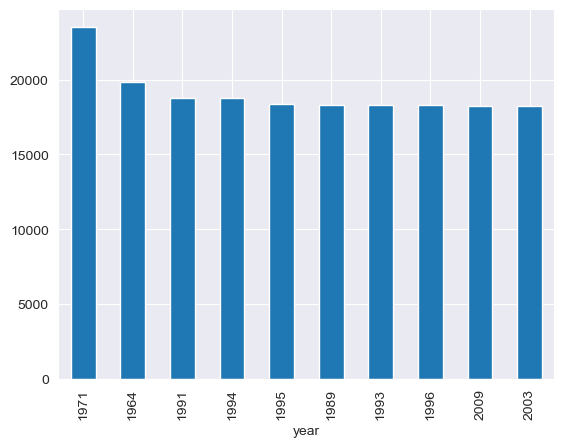

In [592]:
# Now let's target the "base_pay" feature. First, We will group our dataset by the "year" feature.
# Then, we will calculate the average of the "base_pay" feature and plot it on a bar diagram for better understanding.
# Also, we will display only the largest 10 and smallest 10 results only.

# import matplotlib.pyplot as plt

data.groupby('year')['Base_Pay'].mean().nlargest(10).plot(kind = 'bar')

<AxesSubplot:xlabel='year'>

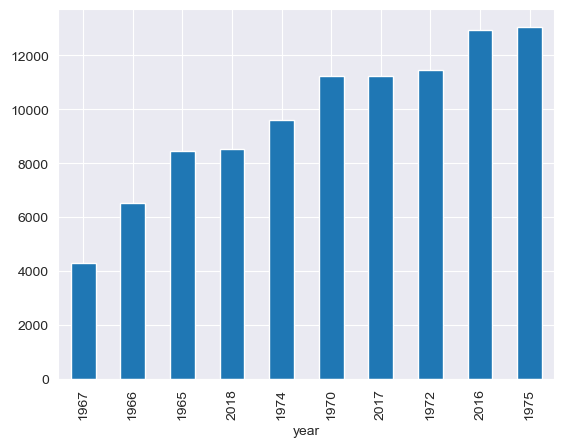

In [593]:
data.groupby('year')['Base_Pay'].mean().nsmallest(10).plot(kind = 'bar')

In [594]:
# From the above two cells, we can see the largest 10 and smallest 10 results,
# which are nothing but the highest and lowest average values of the base pay.
# Now let's sort our "year" column.

data['year'].sort_values(ascending=True)

57658     1958
189805    1958
57657     1958
203897    1958
57661     1958
          ... 
198591    2018
207386    2018
233273    2018
224078    2018
226393    2018
Name: year, Length: 234298, dtype: int64

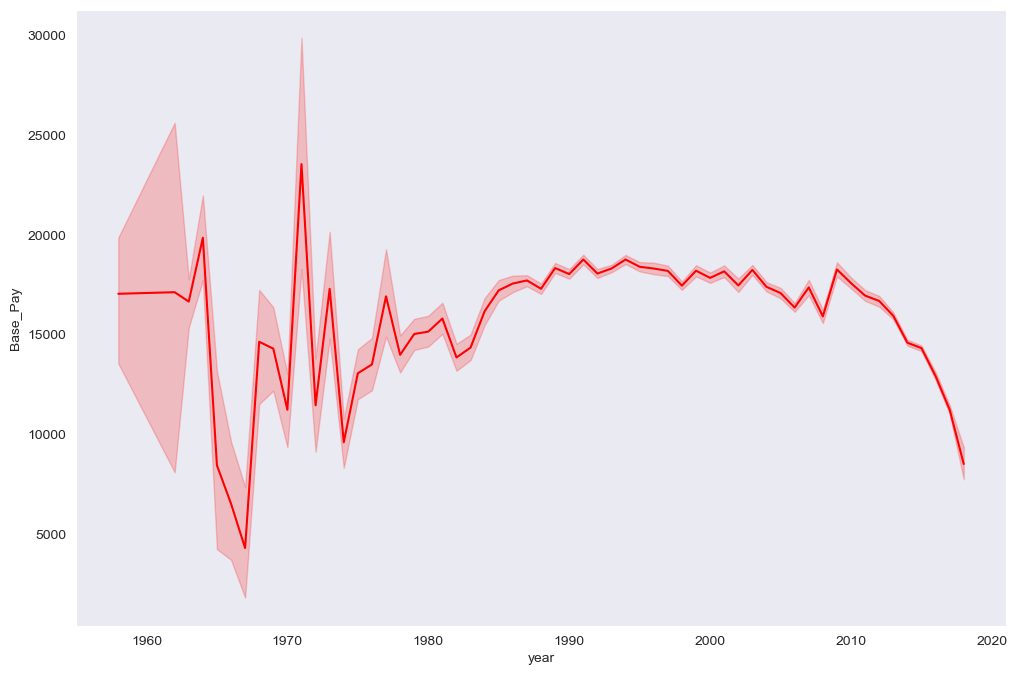

In [595]:
# It is clear from the above result that our dataset contains 60 years of data.
# Now, let's create a line plot showing the relationship between years and their corresponding base pay.
# In our line plot, let the x-axis represent the years, sorted in ascending order, and the y-axis represent the base pay.
# Let the plot have a red line indicating the trend.
# Finally, we will use a dark grid style for the plot background.

# import seaborn as sns

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
with sns.axes_style('dark'):
    sns.lineplot(x=data['year'].sort_values(ascending=True), y= data['Base_Pay'], color = 'red')
plt.show()

In [596]:
# We can notice which decade had the highest and lowest average base pay from the above result.
# Now let's find out which job titles are paid the highest and which ones are paid the lowest.
# First, let's see how many unique jobs are present in our dataset

data.Job_Title.nunique()

2382

In [597]:
# There are 2382 number of unique jobs.
# Now, using the same logic we used earlier, let's calculate the average base pay according to the job titles.
# We will calculate for both highest and lowest.

data.groupby('Job_Title')['Base_Pay'].mean().nlargest(20)

Job_Title
Chief Executive Officer -CCHHS    129370.950000
Senior Director of HIV Service    119270.830000
Chr of the Div of Urology Surg    118427.760000
Chair of the Dept of Medicine     112886.584000
Chair Dept of Trauma  Burn Svc    112265.651000
Chr of the Div of Neuro Surg      105663.895556
Ch of the Div of Ad Cardil Cl     104605.001250
Chr of the Div of Ortho Surg      104058.626000
Med Dept Chair Surgery            102658.094667
Ch of the Div of Mat Fet Med      102583.065000
Chair of Div of Cardioth Surg     101539.677000
Med Dept Chair Emerg Medicine      96497.792000
Chief Medical Officer              96016.280000
Chr of the Div of Otol Surg        94913.097000
Associated Medical Chairman        94821.650000
Med Dept Chair - OB GYN            94669.542727
Med Dept Ch Ortho and Reg Anes     93630.172000
Ch of the Div of Neuro Anesth      92767.935000
Ch of the Div of Pain Mgmt         92561.297000
Chr of the Div of Opht Surg        92236.919000
Name: Base_Pay, dtype: float64

In [598]:
data.groupby('Job_Title')['Base_Pay'].mean().nsmallest(20)

Job_Title
Attendant Patient Care As Req       0.000000
CADD Operator I                     0.000000
Clinical Specialist                 0.000000
Credit Counselor                    0.000000
Engineering Technician I            0.000000
Financial Ops Coord - Assessor      0.000000
Med Dep Chair-Pediatrics            0.000000
Medical Admin-Ambulatory            0.000000
Medical Dep Assoc Chair Radio       0.000000
Medical Dir-Outpatient Svcs         0.000000
Medical Div Chair-Dir of CCU        0.000000
Medical Division Chairman VI        0.000000
Right of Way Agent II               0.000000
Supply Coordinator - Assessor       0.000000
Tax Examiner III                    0.000000
Taxpayer Advocate Analyst IV        0.000000
Tech Review Specialist IV           0.000000
Transporter OFH ARNTE               0.000000
Investigator II Day Report         67.215000
Associate Judge Circuit Court     150.603296
Name: Base_Pay, dtype: float64

In [599]:
# The results for the average highest base pay is fine as can be seen above.
# But there is a problem in the average lowest base pay.
# The average of some job titles is 0.
# This is a problem. Maybe the dataset do not contain the "base_pay" information for these job titles.
# Let's fix this issue.

# First let's see how many instances we have with 0 base pay.

data[data.Base_Pay == 0]

,Fiscal_Year,Fiscal_Quarter,Fiscal_Period,First_Name,Last_Name,Middle_Init,Bureau,Office,Office_Name,Job_Code,Job_Title,Base_Pay,Position_ID,Employee_Identifier,Original_Hire_Date,year
66,2016,1,2016Q1,FRANK,ABBOTT,J,Bureau of Admin.,1500.0,DEPT. OF TRANSPORTATION AND HW,431,Right of Way Agent II,0.0,9517610,f52eb088-72d8-494a-a296-772a71783234,1986-06-20,1986
68,2016,2,2016Q2,KHALIL,ABBOUD,E,Chief Judge,1280.0,ADULT PROBATION DEPT.,1564,Supervisor Adult Probation,0.0,9512676,e9a92ee0-120f-41f3-b824-4e4d7c43cc5c,1982-12-17,1982
69,2016,3,2016Q3,KHALIL,ABBOUD,E,Chief Judge,1280.0,ADULT PROBATION DEPT.,1564,Supervisor Adult Probation,0.0,9512676,e9a92ee0-120f-41f3-b824-4e4d7c43cc5c,1982-12-17,1982
72,2016,2,2016Q2,HERAND,ABCARIAN,E,Bureau of Health,4897.0,STROGER HOSPITAL OF COOK CNTY,1649,Medical Div Chairman XII,0.0,800768,e07ba440-b785-4047-ab96-38c9714ce186,2009-08-17,2009
92,2017,3,2017Q3,ABDALLAH,ABDELHAMID,F,Sheriff,1239.0,DEPARTMENT OF CORRECTIONS,1360,Correctional Officer,0.0,800096,433c0c09-b58e-45c0-96ee-1cf5c315cf5f,2011-06-27,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229649,2018,2,2018Q2,THOMAS,BONDI,R,DEPARTMENT OF CORRECTIONS,1239.0,DEPARTMENT OF CORRECTIONS,1360,Correctional Officer,0.0,9506963,272c860d-26bf-44f1-96af-3056e4c654c0,2012-02-27,2012
230477,2018,2,2018Q2,LILIANNA,KALIN,M,HEALTH,1890.0,Bureau of Health,8089,Sr. Labor & Employ Counsel,0.0,1801745,b12f72e8-e349-42d3-9a36-a3bc62dcabc4,2006-05-30,2006
231487,2018,2,2018Q2,RAUL,BARRAZA,S,DEPARTMENT OF CORRECTIONS,1239.0,DEPARTMENT OF CORRECTIONS,1360,Correctional Officer,0.0,9508604,76bb6a7e-c9f8-4752-be7d-b80a568525a8,2012-02-27,2012
233666,2018,1,2018Q1,TANESHA,WHITE,L,DEPARTMENT OF CORRECTIONS,1239.0,DEPARTMENT OF CORRECTIONS,1360,Correctional Officer,0.0,9508098,58a40df7-f29b-4141-9c52-a08f49e17f14,2002-11-18,2002


In [600]:
# There are 2541 instances with no information about the base_pay
# Let's remove these rows from our dataframe.
# There are some different ways to do so but the one I find easy to understand is:

data = data[data.Base_Pay != 0]

# In the above line, we are extracting the instances whose base_pay feature does not have 0 
# and adding them back into the same dataframe.

In [601]:
# Let's check the number of instances now.

data.shape

(231757, 16)

In [602]:
# Let's repeat the previous steps.

data.Job_Title.nunique()

2364

In [603]:
data.groupby('Job_Title')['Base_Pay'].mean().nsmallest(20)

Job_Title
Associate Judge Circuit Court      150.844069
Judge of the Circuit Court         151.700708
Investigator II Day Report         268.860000
Manager of Compliance-Revenue      309.110000
Manager Field Evaluations          334.740000
Safety Liaison II                  336.095000
Human Resources Assistant          350.220000
Dir of Hospitality Services        807.700000
Traffic Crossing Guards           1159.660647
Laboratory Technician I           1453.036250
Student Intern                    1516.666667
Training Coordinator III          1812.880000
Deputy Press Secretary            2246.400000
Hospital Administration Fellow    2767.175556
Clerk IV                          2774.060388
Janitor I                         2931.849000
Intelligence Manager              2985.620000
Legislative Affairs Adm-Sher      3249.310000
Front End Developer               3334.620000
Facilities Liaison-Sheriff        3398.540000
Name: Base_Pay, dtype: float64

In [604]:
# We have fixed this issue successfully.
# Now, # lets see how the yearly payment is divided in quarters.
# First, we will find out how many times each value in the "fiscal_quarter" feature occurs.

data.Fiscal_Quarter.value_counts()

1    72174
2    71331
4    44330
3    43922
Name: Fiscal_Quarter, dtype: int64

In [605]:
# In our dataset, the base pay of the employees is spread across fiscal quarters.
# So, let's determine the average base pay for each of these fical quarters.

average_per_quarter = data.groupby('Fiscal_Quarter')['Base_Pay'].mean()
average_per_quarter

Fiscal_Quarter
1    15223.171414
2    17872.825494
3    16411.799485
4    18965.311050
Name: Base_Pay, dtype: float64

([<matplotlib.patches.Wedge at 0x2401a061970>,
 [Text(-0.707334067771227, 0.8424241903994741, 'Quarter_1'),
  Text(-0.878268558492273, -0.6623023019467054, 'Quarter_2'),
  Text(0.6642377272862052, -0.8768057034769202, 'Quarter_3'),
  Text(0.8408621374415534, 0.7091902888627442, 'Quarter_4')])

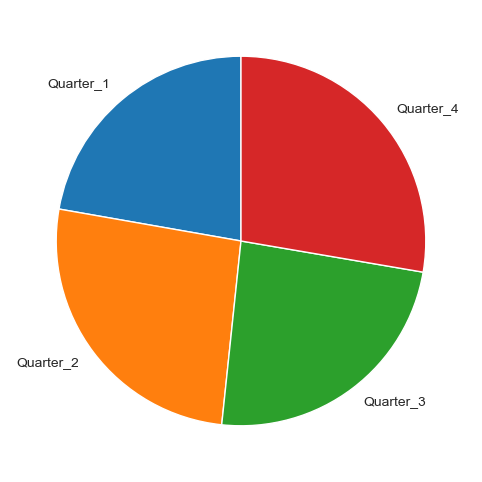

In [606]:
# Let us generate a pie chart for better understanding.

label = ['Quarter_1','Quarter_2','Quarter_3','Quarter_4' ] 

plt.figure(figsize=(10,6))
plt.pie(average_per_quarter, labels=label, startangle=90)

In [607]:
# It is easily comprehensible that the base pay is almost equal in all the fiscal quarters.
# Now, for the next step let's repeat the same steps and try to figure out similar statistics for each month.

# To do so, we will first introduce a column that shows the month of hire.
# This step is similar to introducing the "year" column.

data['Month_of_hire'] = data['Original_Hire_Date'].dt.month

In [608]:
# We know that the "month_of_hire" column contains the date in numeric format.
# Therefore, we can assume that the new column we just created holds numeric values.
# We can check by calling the head() method.

data.head(5)

,Fiscal_Year,Fiscal_Quarter,Fiscal_Period,First_Name,Last_Name,Middle_Init,Bureau,Office,Office_Name,Job_Code,Job_Title,Base_Pay,Position_ID,Employee_Identifier,Original_Hire_Date,year,Month_of_hire
0,2016,1,2016Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20088.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,5
1,2016,2,2016Q2,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23436.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,5
2,2016,3,2016Q3,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20422.82,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,5
3,2016,4,2016Q4,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23904.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,5
4,2017,1,2017Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20745.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,5


In [609]:
# Let's alter the month_of_hire column to show the name of the month instead of the chronogical number of that month.

data['Month_of_hire'] = pd.to_datetime(data['Month_of_hire'], format='%m').dt.strftime('%B')

In [610]:
# Let's check to see if it worked.

data.head(5)

,Fiscal_Year,Fiscal_Quarter,Fiscal_Period,First_Name,Last_Name,Middle_Init,Bureau,Office,Office_Name,Job_Code,Job_Title,Base_Pay,Position_ID,Employee_Identifier,Original_Hire_Date,year,Month_of_hire
0,2016,1,2016Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20088.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May
1,2016,2,2016Q2,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23436.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May
2,2016,3,2016Q3,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20422.82,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May
3,2016,4,2016Q4,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23904.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May
4,2017,1,2017Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20745.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May


In [611]:
# Now, let's introduce one more column.
# In this new column we will calculate and store the monthly base pay of the employee.

data['Monthly_Pay'] = data['Base_Pay'] /12

In [612]:
# Now, let's verify the changes again.

data.head(5)

,Fiscal_Year,Fiscal_Quarter,Fiscal_Period,First_Name,Last_Name,Middle_Init,Bureau,Office,Office_Name,Job_Code,Job_Title,Base_Pay,Position_ID,Employee_Identifier,Original_Hire_Date,year,Month_of_hire,Monthly_Pay
0,2016,1,2016Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20088.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1674.000000
1,2016,2,2016Q2,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23436.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1953.000000
2,2016,3,2016Q3,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20422.82,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1701.901667
3,2016,4,2016Q4,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23904.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1992.066667
4,2017,1,2017Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20745.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1728.816667


In [613]:
# Now, we can find out in which month most of the people are hired.
# By determining this, we can find out more about the peak hiring season.

# First, let's count the number of times the month_of_hire values are repeated.
# This will give us an idea about how many people are hired in those months.

data.Month_of_hire.value_counts()

June         28287
July         27355
August       21280
April        19693
September    19060
May          18745
October      18021
February     16897
March        16413
November     16236
December     14978
January      14792
Name: Month_of_hire, dtype: int64

<AxesSubplot:xlabel='Month_of_hire'>

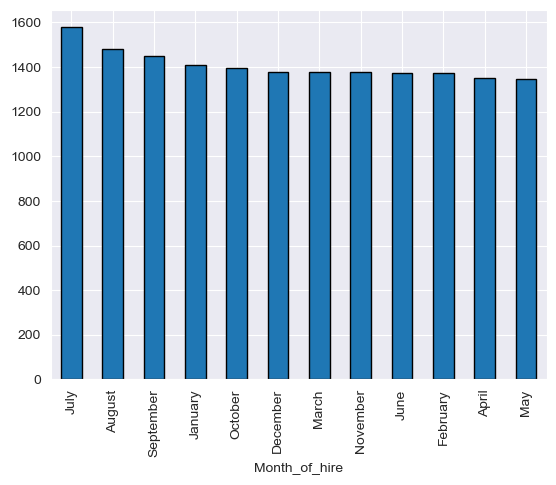

In [614]:
# From above result, it is clear that the month of june has the highest number of hires
# and the month of january has the lowest number of hires.
# It is safe to assume that the third quarter of the year is the season where the hiring is at peak.

# Now, let's find out the average base pay for each month.
# Let's also plot a bar chart for better understanding.

data.groupby('Month_of_hire')['Monthly_Pay'].mean().sort_values(ascending = False).plot(kind = 'bar', edgecolor = 'black' )

In [615]:
# From above visualization, it is clear that the months of July, august and september has the highest average base pay.
# This is the same quarter where the hiring is at peak.
# Can we assume that the new hires in the third quarter are being offered larger base pay packages?
# Let's explore a little more. Let's take a look at other features in our dataset.

data.head(10)

,Fiscal_Year,Fiscal_Quarter,Fiscal_Period,First_Name,Last_Name,Middle_Init,Bureau,Office,Office_Name,Job_Code,Job_Title,Base_Pay,Position_ID,Employee_Identifier,Original_Hire_Date,year,Month_of_hire,Monthly_Pay
0,2016,1,2016Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20088.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1674.000000
1,2016,2,2016Q2,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23436.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1953.000000
2,2016,3,2016Q3,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20422.82,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1701.901667
3,2016,4,2016Q4,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23904.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1992.066667
4,2017,1,2017Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20745.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1728.816667
5,2017,2,2017Q2,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,24473.38,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,2039.448333
6,2017,3,2017Q3,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,21217.35,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1768.112500
7,2016,1,2016Q1,DAVID,AARONS,K,Assessor,1040.0,COUNTY ASSESSOR,5049,Residential Model Sr Anal III,17770.86,9500731,f313b1c3-1b1a-4b07-bb75-a8c850a91bac,1998-09-28,1998,September,1480.905000
8,2016,2,2016Q2,DAVID,AARONS,K,Assessor,1040.0,COUNTY ASSESSOR,5049,Residential Model Sr Anal III,20800.67,9500731,f313b1c3-1b1a-4b07-bb75-a8c850a91bac,1998-09-28,1998,September,1733.389167
9,2016,3,2016Q3,DAVID,AARONS,K,Assessor,1040.0,COUNTY ASSESSOR,5049,Residential Model Sr Anal III,17873.76,9500731,f313b1c3-1b1a-4b07-bb75-a8c850a91bac,1998-09-28,1998,September,1489.480000


In [616]:
# We have the 'bureau' feature.
# There are many offices under each department.
# Let's determine the number of offices under each bureau.
# We will also determine the average base pay with respect to the offices.
# Doing so we will ultimately figure out the average base pay of each department.

# We will achieve this in three steps.
# First, we will group the data by Bureau column.
# Then, we will count the number of offices for each value in bureau column.
# Lastly, we will calculate the average of base pay for each department.
# we will perform these three steps together.

data.groupby('Bureau').aggregate({'Office':'count', 'Base_Pay':'mean'}).nlargest(15,columns=['Office'])

,Office,Base_Pay
Bureau,,
Bureau of Health,52886,19422.269489
Sheriff,51311,16774.608702
Chief Judge,24035,14336.584002
Clerk of Circuit Ct.,12891,13245.250423
State's Attorney,11004,19149.285550
STROGER HOSPITAL OF COOK CNTY,7600,21540.372201
DEPARTMENT OF CORRECTIONS,7591,14002.515391
Public Defender,5386,22071.640046
CORPORATE,4929,11704.547271


<AxesSubplot:xlabel='Base_Pay', ylabel='Density'>

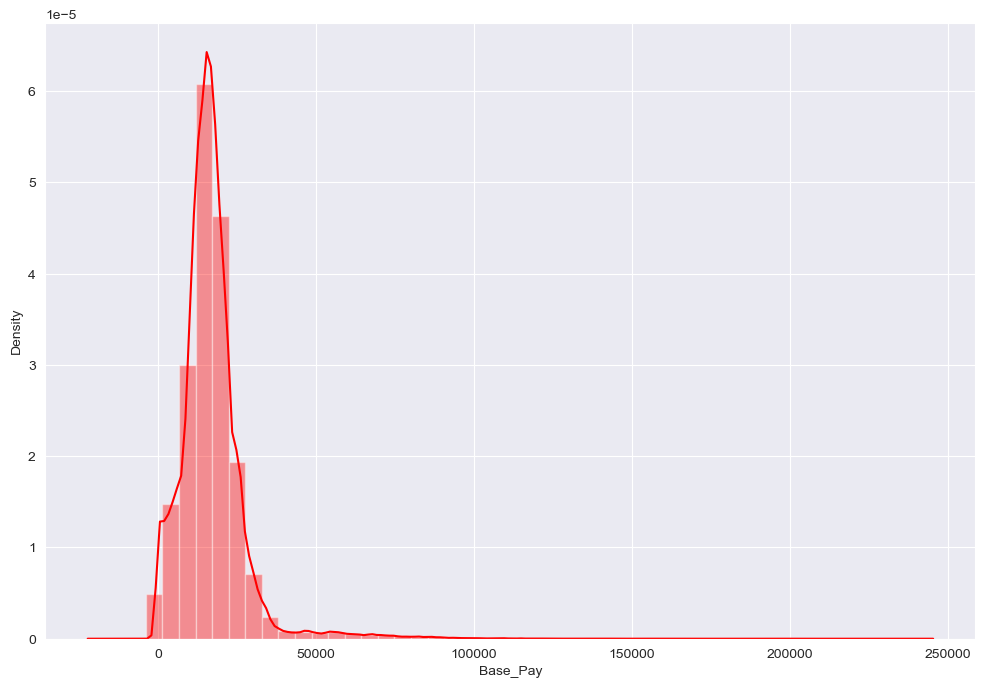

In [617]:
# The above result shows the number of offices for each department and their respective average base pay.
# Similarly, we can keep on going and explore the data in many other ways.
# We can use other features as the center of attraction as we did with "base_pay" column and perform similar operations.
# In this way, we are open to several possibilities of exploring the dataset.
# But, our goal is to build a model that predicts the "base_pay". So we kept our operations around that column.

# Let's generate a histogram to check for the distribution of the base_pay column.

plt.figure(figsize=(12,8))
sns.distplot(data['Base_Pay'], color='red')

<AxesSubplot:xlabel='Base_Pay'>

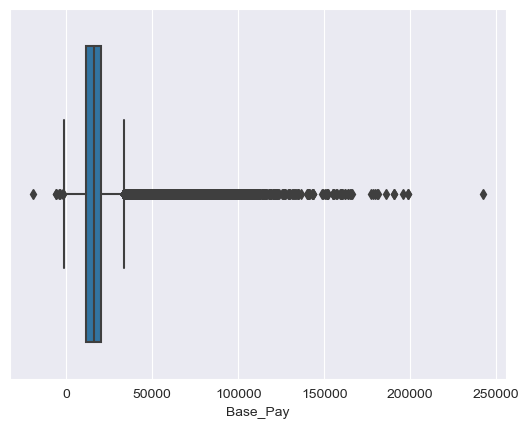

In [618]:
# The histogram provides a visual representation of the distribution of base pay values.
# We can see how frequently different ranges of base pay occurs in the dataset.

# Now let's also check for outliers before moving to next section.

sns.boxplot(data['Base_Pay'])

In [619]:
# It is clearly visible that our dataset does contain some outliers.
# But in my opinion, they seem to be negligeable.
# So, let's conclude our exploratory data analysis section here and move forward without worrying about outliers.

# Notice that we made a few of changes to the dataset.
# We explored and introduced two more columns.

### Part 4 - Feature Engineering

In [620]:
# Let's start by creating an extra copy of our dataset.
# We will do so in case we make changes that can't be reversed.

data2 = data

In [621]:
# Verify the previous step

data2.head()

,Fiscal_Year,Fiscal_Quarter,Fiscal_Period,First_Name,Last_Name,Middle_Init,Bureau,Office,Office_Name,Job_Code,Job_Title,Base_Pay,Position_ID,Employee_Identifier,Original_Hire_Date,year,Month_of_hire,Monthly_Pay
0,2016,1,2016Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20088.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1674.000000
1,2016,2,2016Q2,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23436.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1953.000000
2,2016,3,2016Q3,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20422.82,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1701.901667
3,2016,4,2016Q4,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,23904.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1992.066667
4,2017,1,2017Q1,AMRITH,AAKRE,K,State's Attorney,1250.0,STATES ATTORNEY,1172,Assistant State's Attorney,20745.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,2005-05-16,2005,May,1728.816667


In [622]:
# Now, let's start by dropping the columns that are not relevant to our goal.
# Let's drop irrelevant columns and keep only those that are relevant.
# We can do so by using the drop method. But I think there is a more eaier way to do it.
# We can simply select and copy the columns we need from the original dataset.

data2 = data[['Fiscal_Year', 'Fiscal_Quarter', 'Office','Job_Code', 'Base_Pay', 'Position_ID', 'year','Month_of_hire', 'Monthly_Pay']]
data2

,Fiscal_Year,Fiscal_Quarter,Office,Job_Code,Base_Pay,Position_ID,year,Month_of_hire,Monthly_Pay
0,2016,1,1250.0,1172,20088.00,9510200,2005,May,1674.000000
1,2016,2,1250.0,1172,23436.00,9510200,2005,May,1953.000000
2,2016,3,1250.0,1172,20422.82,9510200,2005,May,1701.901667
3,2016,4,1250.0,1172,23904.80,9510200,2005,May,1992.066667
4,2017,1,1250.0,1172,20745.80,9510200,2005,May,1728.816667
...,...,...,...,...,...,...,...,...,...
234294,2018,2,1250.0,1172,19001.95,9510048,2013,January,1583.495833
234295,2018,2,1200.0,2452,27098.40,9502511,1988,January,2258.200000
234296,2018,1,1280.0,1567,19217.40,9512421,1985,July,1601.450000
234297,2018,1,4893.0,5296,9698.80,9519643,2016,August,808.233333


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Fiscal_Year'),
  Text(1.5, 0, 'Fiscal_Quarter'),
  Text(2.5, 0, 'Office'),
  Text(3.5, 0, 'Job_Code'),
  Text(4.5, 0, 'Base_Pay'),
  Text(5.5, 0, 'Position_ID'),
  Text(6.5, 0, 'year'),
  Text(7.5, 0, 'Monthly_Pay')])

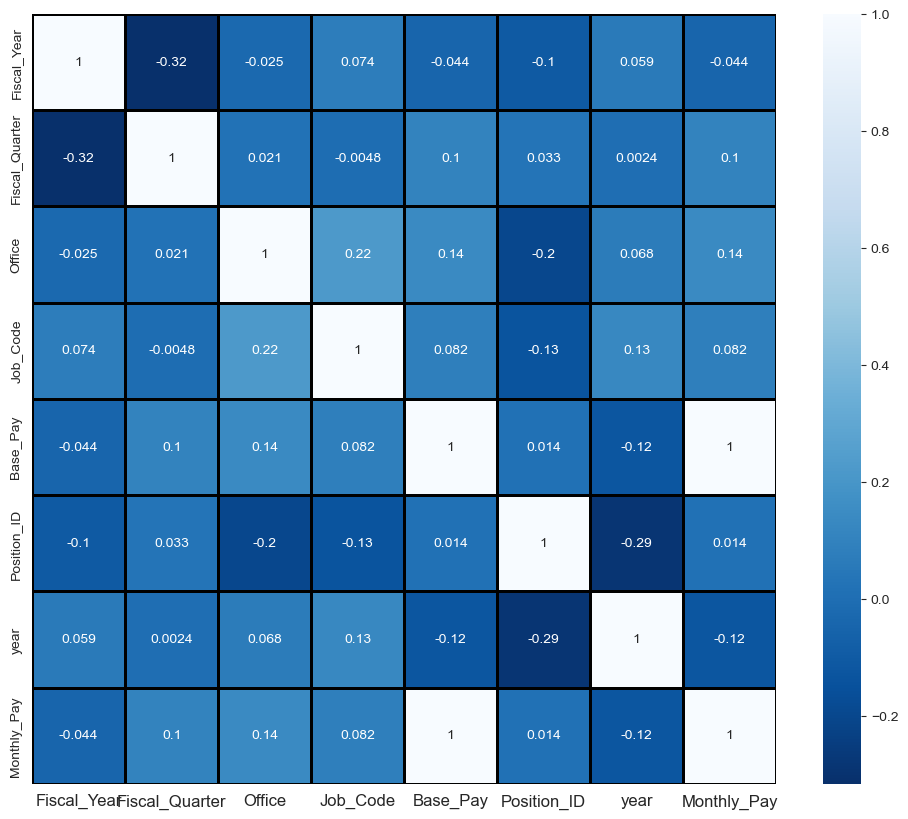

In [623]:
# Now, let's check for collinearity between the columns in our new dataset

plt.figure(figsize=(12,10))
sns.heatmap(data2.corr(), linecolor='black', linewidths=2.0, annot=True, cmap='Blues_r')
plt.xticks(fontsize = 12)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Fiscal_Year'),
  Text(1.5, 0, 'Fiscal_Quarter'),
  Text(2.5, 0, 'Office'),
  Text(3.5, 0, 'Job_Code'),
  Text(4.5, 0, 'Position_ID'),
  Text(5.5, 0, 'year'),
  Text(6.5, 0, 'Monthly_Pay')])

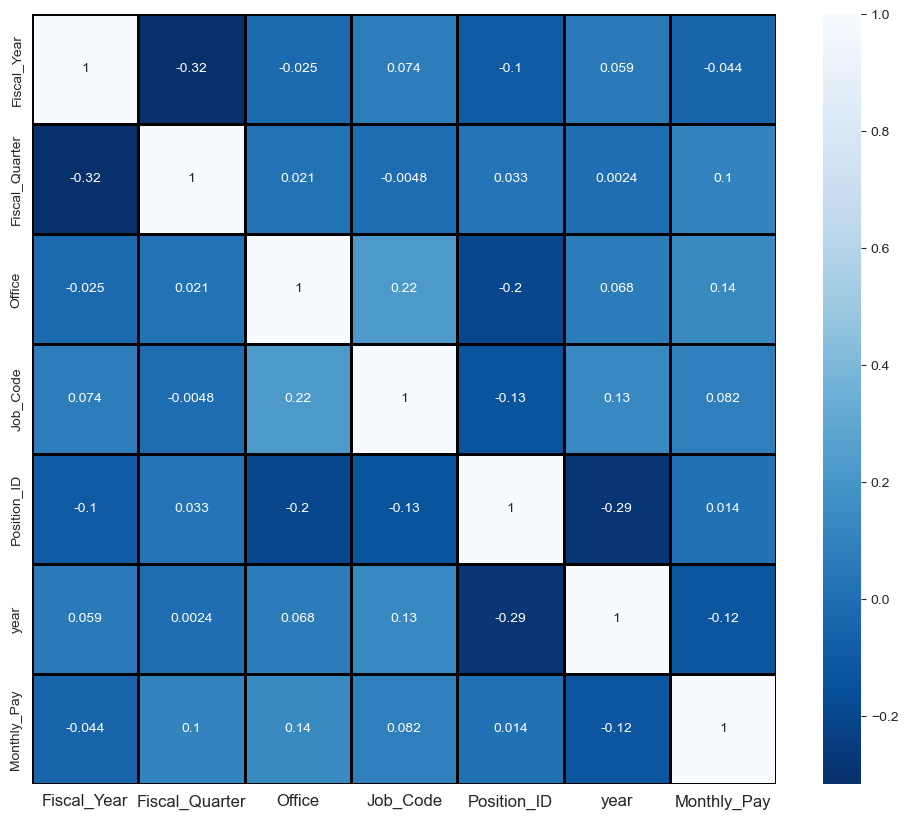

In [624]:
# Notice that the monthly_pay column and the base_pay column are both collinear.
# This is because we derived the monthly_pay column from the base_pay column.
# Let's remove the base_pay column from our dataset and repeat the above step.
# Also base_pay column is our target value so we will separate it and store it in a variable.

y = data2.pop('Base_Pay')
x = data2 

# We removed the base_pay column and stored it in variable 'y'.
# We stored the rest of the dataset in variable 'x'.

# Now, we repeat the previous step.

plt.figure(figsize=(12,10))
sns.heatmap(data2.corr(), linecolor='black', linewidths=2.0, annot=True, cmap='Blues_r')
plt.xticks(fontsize = 12)

In [625]:
# Now, there is no such heavy collinearity in our dataset.
# Also, we separated our target value from the dataset so from here on we will use the x dataframe.
# Let's check our dataframe.

x.head(5)

,Fiscal_Year,Fiscal_Quarter,Office,Job_Code,Position_ID,year,Month_of_hire,Monthly_Pay
0,2016,1,1250.0,1172,9510200,2005,May,1674.000000
1,2016,2,1250.0,1172,9510200,2005,May,1953.000000
2,2016,3,1250.0,1172,9510200,2005,May,1701.901667
3,2016,4,1250.0,1172,9510200,2005,May,1992.066667
4,2017,1,1250.0,1172,9510200,2005,May,1728.816667


In [626]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231757 entries, 0 to 234298
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Fiscal_Year     231757 non-null  int64  
 1   Fiscal_Quarter  231757 non-null  int64  
 2   Office          231757 non-null  float64
 3   Job_Code        231757 non-null  int64  
 4   Position_ID     231757 non-null  int64  
 5   year            231757 non-null  int64  
 6   Month_of_hire   231757 non-null  object 
 7   Monthly_Pay     231757 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 15.9+ MB


In [627]:
# Here, notice that the month_of_hire is a categorical column which includes 12 categories (Months of the year).
# We can break this column down into 12 separate columns and use each of them as a boolean type instead of object string.
# First we will create a dataframe and extract each of the value from "month_of_hire" column.
# We will insert these values into new dataframe as columns.

x_dummies = pd.get_dummies(data['Month_of_hire'], prefix = 'Month',prefix_sep='_',drop_first=True)
x_dummies

,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
234294,0,0,0,1,0,0,0,0,0,0,0
234295,0,0,0,1,0,0,0,0,0,0,0
234296,0,0,0,0,1,0,0,0,0,0,0
234297,1,0,0,0,0,0,0,0,0,0,0


In [628]:
# Now let's join this dataframe to our dataframe and drop the "month_of_hire" column.

x = x.join(x_dummies)
x.drop(columns=['Month_of_hire'], inplace=True)

In [629]:
x.head(5)

,Fiscal_Year,Fiscal_Quarter,Office,Job_Code,Position_ID,year,Monthly_Pay,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,2016,1,1250.0,1172,9510200,2005,1674.000000,0,0,0,0,0,0,0,1,0,0,0
1,2016,2,1250.0,1172,9510200,2005,1953.000000,0,0,0,0,0,0,0,1,0,0,0
2,2016,3,1250.0,1172,9510200,2005,1701.901667,0,0,0,0,0,0,0,1,0,0,0
3,2016,4,1250.0,1172,9510200,2005,1992.066667,0,0,0,0,0,0,0,1,0,0,0
4,2017,1,1250.0,1172,9510200,2005,1728.816667,0,0,0,0,0,0,0,1,0,0,0


In [630]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231757 entries, 0 to 234298
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Fiscal_Year      231757 non-null  int64  
 1   Fiscal_Quarter   231757 non-null  int64  
 2   Office           231757 non-null  float64
 3   Job_Code         231757 non-null  int64  
 4   Position_ID      231757 non-null  int64  
 5   year             231757 non-null  int64  
 6   Monthly_Pay      231757 non-null  float64
 7   Month_August     231757 non-null  uint8  
 8   Month_December   231757 non-null  uint8  
 9   Month_February   231757 non-null  uint8  
 10  Month_January    231757 non-null  uint8  
 11  Month_July       231757 non-null  uint8  
 12  Month_June       231757 non-null  uint8  
 13  Month_March      231757 non-null  uint8  
 14  Month_May        231757 non-null  uint8  
 15  Month_November   231757 non-null  uint8  
 16  Month_October    231757 non-null  uint

In [631]:
# Notice that we created 12 new columns and each of these columns has an int datatype with 8 bits.
# These new columns contain two values 0 and 1.
# 0 meaning False and 1 meaning True.
# we eliminated the object string and made it a little easier to perform operations.

# Now let's standardize the dataset.

# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# The above line creates a new instance of StandardScaler Class.
# The StandardScaler is used to standardize features by removing the mean and scaling to unit variance.

In [632]:
# Let's standardize the features stored in x

x[x.columns] = scaler.fit_transform(x[x.columns])

# Let me explain the above line. Here's what happens:
# First, the 'x.columns' returns the column names of x.
# Then, 'x[x.columns]' selects all the columns in x.
# After that, the 'scaler.fit_transform(x[x.columns])' part scales all the selected columns.
# The resulting scaled values are then assigned back to the respective columns in x using the same 'x[x.columns]'.

In [633]:
# Let's reshape the y dataframe.

y = y.values.reshape(-1,1)

# The above line will convert the single column in the y dataframe into a 2D array.

In [634]:
# Let's scale the values in y dataframe as well.
# This way we will ensure that the target values are also scaled to unit values.

y = scaler.fit_transform(y)

In [635]:
# By performing the previous steps, we eliminated any chance of biases among the data in our columns.
# All the columns noiw contain unit values.
# Let's move to the next step which is to build a predictive model.

### Part 5 - Predictive Modeling and Validation

In [636]:
# First we will need to split our dataset into training data and testing data.

# from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y , train_size=0.75, random_state=42,shuffle=True)

# Here we extracted 75% of data randomly and created a training datset with it.
# The remaining 25% data will automatically be assigned as testing data.

In [637]:
# Let's check the 4 dataframes we just created

x_train.shape

(173817, 18)

In [638]:
x_test.shape

(57940, 18)

In [639]:
y_train.shape

(173817, 1)

In [640]:
y_test.shape

(57940, 1)

In [641]:
# Now that our training data and testing data is ready, Let's proceed to building a model.
# First let's perform Linear Regression.

# from sklearn.linear_model import LinearRegression

# Creating an model instance of the LinearRegression class.

Linear_model = LinearRegression()

# Fitting the model with the training data.

Linear_model.fit(x_train, y_train)

# Let's use the predict method to make the model predict our target values.

y_pred_linear = Linear_model.predict(x_test)

In [642]:
# Now, Let's calculate few statistics and print them.

# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
mae = mean_absolute_error(y_test, y_pred_linear)

print("The R-Squared Score is: " + str(r2))
print("The Mean Squared Error is: " + str(mse))
print("The Root Mean Squared Error is: " + str(rmse))
print("The Mean Absolute Error is: " + str(mae))

The R-Squared Score is: 1.0
The Mean Squared Error is: 1.0710553941627577e-29
The Root Mean Squared Error is: 3.2726982662059723e-15
The Mean Absolute Error is: 2.3121412355791717e-15


In [643]:
# Let's Validate by comparing the R-Squared score of the model's predicted data to the actual data.

r2_train = r2_score(y_train, Linear_model.predict(x_train))
r2_train

1.0

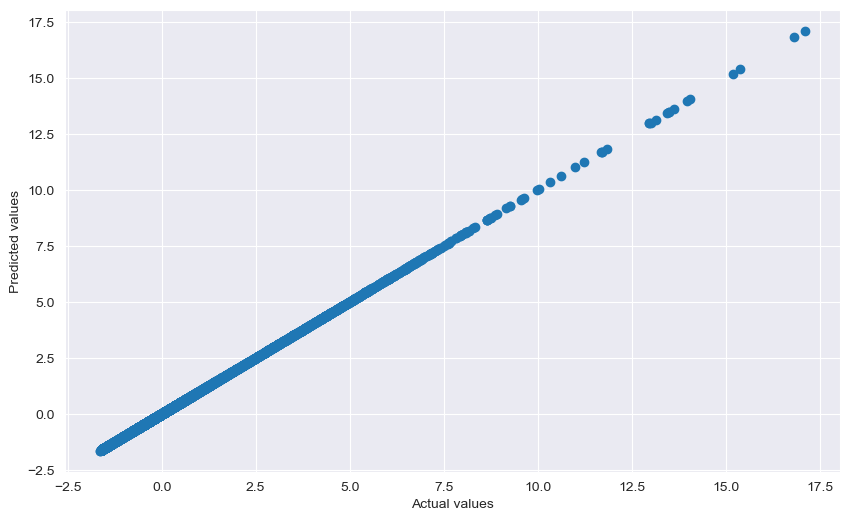

In [644]:
# We can visualize these findings to understand it better.

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_linear)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [645]:
# Let's repeat the above steps but with a different model.
# Let's experiment with Support Vector Regressor

# from sklearn.svm import SVR

model_svr = SVR()

model_svr.fit(x_train,y_train)

SVR()

In [646]:
y_pred_svr = model_svr.predict(x_test)

r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("The R-Squared Score is: " + str(r2_svr))
print("The Mean Squared Error is: " + str(mse_svr))
print("The Root Mean Squared Error is: " + str(rmse_svr))
print("The Mean Absolute Error is: " + str(mae_svr))

# Validating the same way
print(" ")
print("Validating SVR: ")
r2_train_svr = r2_score(y_train, model_svr.predict(x_train))
r2_train_svr

The R-Squared Score is: 0.9906385016760155
The Mean Squared Error is: 0.00923342090853018
The Root Mean Squared Error is: 0.09609069106073793
The Mean Absolute Error is: 0.03511641023178011
 
Validating SVR: 


0.9927326384950533

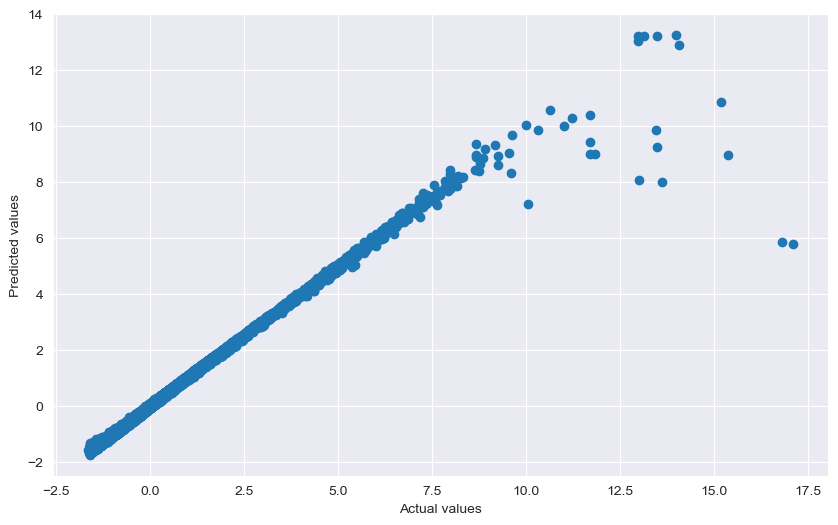

In [647]:
# Here, the R2 score of training dataset is slightly more than that of testing dataset which means that model is performing accurately.
# We can visualize these findings to understand it better.

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_svr)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [648]:
# Let's repeat the above steps again but with a different model.
# Let's experiment with Decision Tree Regressor

# from sklearn.tree import DecisionTreeRegressor

model_DTR = DecisionTreeRegressor()

model_DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [649]:
y_pred_DTR = model_DTR.predict(x_test)

r2_DTR = r2_score(y_test, y_pred_DTR)
mse_DTR = mean_squared_error(y_test, y_pred_DTR)
rmse_DTR = mean_squared_error(y_test, y_pred_DTR, squared=False)
mae_DTR = mean_absolute_error(y_test, y_pred_DTR)

print("The R-Squared Score is: " + str(r2_DTR))
print("The Mean Squared Error is: " + str(mse_DTR))
print("The Root Mean Squared Error is: " + str(rmse_DTR))
print("The Mean Absolute Error is: " + str(mae_DTR))

# Validating the same way
print(" ")
print("Validating Decision Tree: ")
r2_train_DTR = r2_score(y_train, model_DTR.predict(x_train))
r2_train_DTR

The R-Squared Score is: 0.9999858075675555
The Mean Squared Error is: 1.3998261596707264e-05
The Root Mean Squared Error is: 0.003741425075650622
The Mean Absolute Error is: 0.00010082256125855401
 
Validating DTR: 


1.0

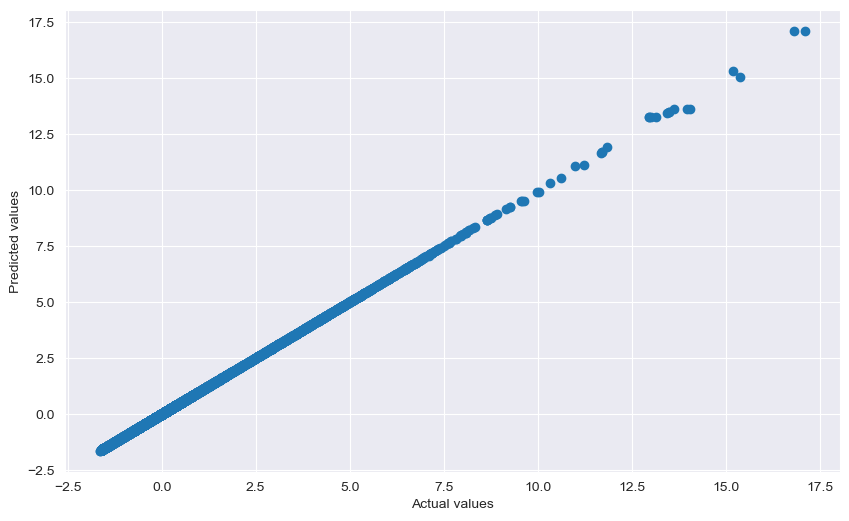

In [650]:
# We can visualize these findings to understand it better.

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_DTR)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [651]:
# Let's repeat the above steps but with a different model.
# Let's experiment with Random Forest Regression.

# from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor()

model_RF.fit(x_train,y_train)

RandomForestRegressor()

In [653]:
y_pred_RF = model_RF.predict(x_test)

r2_RF = r2_score(y_test, y_pred_RF)
mse_RF = mean_squared_error(y_test, y_pred_RF)
rmse_RF = mean_squared_error(y_test, y_pred_RF, squared=False)
mae_RF = mean_absolute_error(y_test, y_pred_RF)

print("The R-Squared Score is: " + str(r2_RF))
print("The Mean Squared Error is: " + str(mse_RF))
print("The Root Mean Squared Error is: " + str(rmse_RF))
print("The Mean Absolute Error is: " + str(mae_RF))

# Validating the same way
print(" ")
print("Validating Random Forest: ")
r2_train_RF = r2_score(y_train, model_RF.predict(x_train))
r2_train_RF

The R-Squared Score is: 0.9999843125198861
The Mean Squared Error is: 1.5472855078661303e-05
The Root Mean Squared Error is: 0.0039335550178764885
The Mean Absolute Error is: 8.850695970900948e-05
 
Validating Random Forest: 


0.9999777611635601

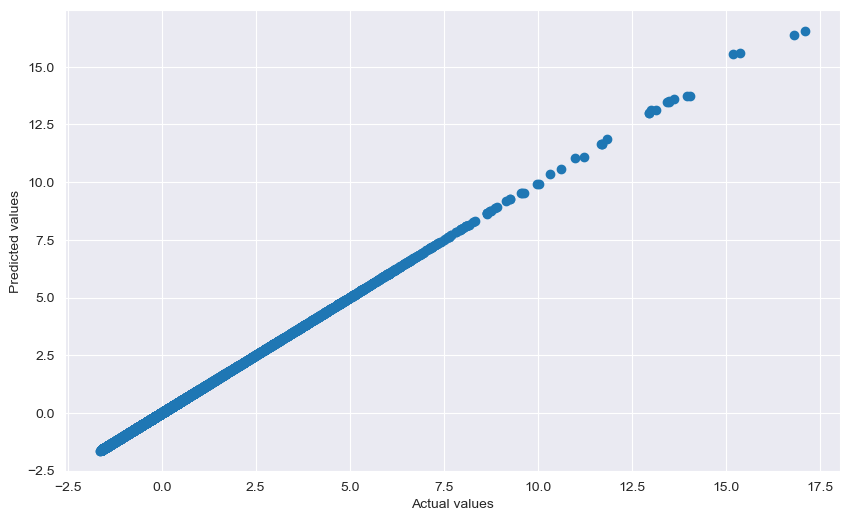

In [654]:
# We can visualize these findings to understand it better.

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_RF)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

### Part 6 - Optimization

In [657]:
# Notice that out of all the models we have trained, Random Forest has the lowest MSE with corresponding R2 score.
# Therefore, Let's Optimize Random Forest Regression model.
# Let's use GridSearchCV for Model Tuning.

# from sklearn.model_selection import GridSearchCV
# from sklearn import ensemble

model_t = GridSearchCV(ensemble.RandomForestRegressor(), {'n_estimators': [10,15, 30], 'max_depth': [5, 10, 15, 20],'min_samples_leaf': [1, 2, 4],},cv=3)
model_t.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 15, 30]})

In [658]:
# Let's breakdown the above two lines to understadn what is being done here.

# 'ensemble.RandomForestRegressor()`: This part creates an instance of a RandomForestRegressor model
# This instance is an ensemble learning method for used regression tasks.

# `{'n_estimators': [10,15, 30], 'max_depth': [5, 10, 15, 20],'min_samples_leaf': [1, 2, 4],}`
# This part is a dictionary specifying the hyperparameter grid to search.
# It includes different values for 'n_estimators' (number of trees in the forest), 'max_depth' (maximum depth of the trees), and 'min_samples_leaf' (minimum samples required to be at a leaf node).

# `cv=3` This part specifies the number of folds for cross-validation during the grid search.
# In this case, we've set it to 3, meaning the data will be split into 3 subsets for cross-validation.

# `model_t.fit(x_train, y_train)`: This line fits the GridSearchCV model to the training data:

In [659]:
# Now that we have performed the GridSearchCV, Let's print out some information we need.

print(model_t.best_estimator_)
print(model_t.best_params_)
print(model_t.best_score_)

RandomForestRegressor(max_depth=15, n_estimators=15)
{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 15}
0.9998230075827242


In [660]:
# We have found the best parameters and now we can use these to optimize our model.
# Let's repeat the Random Forest Regression steps with optimized parameters.

final_model = RandomForestRegressor(max_depth=20, n_estimators=30, min_samples_leaf=1)

final_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=30)

In [661]:
predicted = final_model.predict(x_test)

r2_Final = r2_score(y_test, predicted)
mse_Final = mean_squared_error(y_test, predicted)
rmse_Final = mean_squared_error(y_test, predicted, squared=False)
mae_Final = mean_absolute_error(y_test, predicted)

print("The R-Squared Score is: " + str(r2_Final))
print("The Mean Squared Error is: " + str(mse_Final))
print("The Root Mean Squared Error is: " + str(rmse_Final))
print("The Mean Absolute Error is: " + str(mae_Final))

# Validating the same way
print(" ")
print("Validating the optimized Random Forest: ")
r2_train_Final = r2_score(y_train, final_model.predict(x_train))
r2_train_Final

The R-Squared Score is: 0.9999865466761145
The Mean Squared Error is: 1.3269264999496914e-05
The Root Mean Squared Error is: 0.003642700234646946
The Mean Absolute Error is: 9.468430089747949e-05
 
Validating the optimized Random Forest: 


0.999968287488737

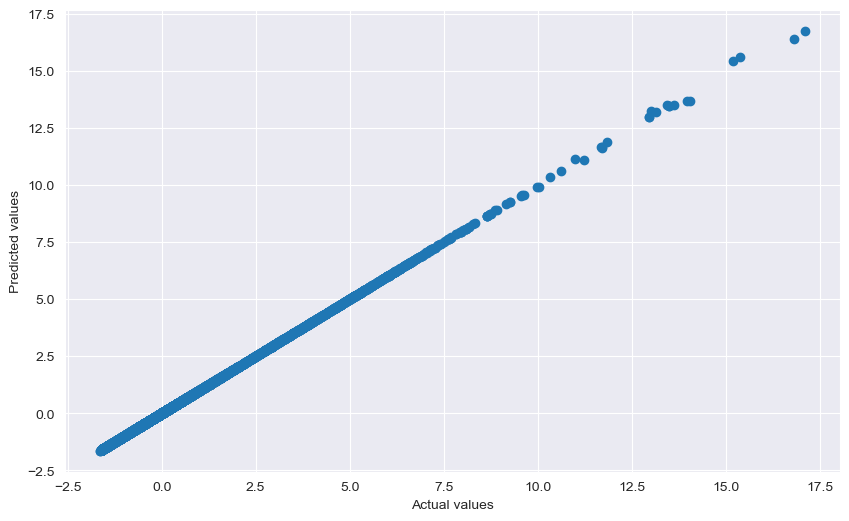

In [662]:
# We can visualize these findings to understand it better.

plt.figure(figsize=(10,6))
plt.scatter(y_test,predicted)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [666]:
# Notice that it took a really long time for GridSearchCV to train the model.
# Let's save these models so we won't have to repeat the whole process.

# import joblib as jb

# Saving the optimized Random Forest Model:

jb.dump(final_model, filename= r'C:\Users\Amaan Ahmed\Music\Project\RF_model.pkl')

# Saving the Grid Search Model:

jb.dump(model_t, filename=r'C:\Users\Amaan Ahmed\Music\Project\grid_estimator.pkl')

['C:\\Users\\Amaan Ahmed\\Music\\Project\\grid_estimator.pkl']

# END OF PROJECT

### Thoughts regarding the project outlines and programming practices:

In my opinion, our code looks well-organized and demonstrates a solid understanding of data science and machine learning principles, not to mention we've also followed good programming practices. Let's discuss some of the positive aspects to learn from this project:

1. Modular Structure: We've broken down our code into different sections, which makes it easy to read and understand. Each section has a clear purpose and is appropriately commented.

2. Clear and Informative Comments: Our comments provide helpful explanations of what each section of code does. This is very important for anyone reading your code, including yourself in the future.

3. Consistent Naming Conventions: Our variable names are clear and follow a consistent naming convention, which enhances code readability.

4. Use of Libraries: We've imported the necessary libraries at the beginning, which is considered a good practice.

5. Exploratory Data Analysis: We've performed a thorough exploratory data analysis, which is crucial in understanding the dataset before applying any machine learning models.

6. Data Preprocessing: We've handled missing values, converted data types, and standardized the features, which are essential steps in data preprocessing.

7. Modeling and Evaluation: We've applied different machine learning models, evaluated their performance, and even performed model optimization using GridSearchCV.

8. Visualizations: We've used visualizations to present our findings, which is a great way to communicate insights.

9. Optimization: We've gone a step further by optimizing the Random Forest model using GridSearchCV.

10. Validation and Model Comparison: We've validated our models and compared their performance, providing a clear understanding of how well they are performing.

Note: The above comments are my personal opinion and you are not obligated to agree with them.